In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input

train_data_dir='/kaggle/input/fer2013/train'  
validation_data_dir='/kaggle/input/fer2013/test'

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1.0 / 255)
train_generator=train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',  
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)
print("Success!")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Success!


In [3]:
model = Sequential()
model.add(Input(shape=(48, 48, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,110,535 (19.50 MB)

 Trainable params: 5,110,535 (19.50 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs=15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)
model.save('/kaggle/working/new_model.h5')
print("DONE!!")

Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 423s 470ms/step - accuracy: 0.2544 - loss: 1.8000 - val_accuracy: 0.3019 - val_loss: 1.7089
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 384s 427ms/step - accuracy: 0.3173 - loss: 1.6812 - val_accuracy: 0.4450 - val_loss: 1.5021
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 450s 436ms/step - accuracy: 0.3959 - loss: 1.5409 - val_accuracy: 0.4783 - val_loss: 1.3769
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 379s 421ms/step - accuracy: 0.4437 - loss: 1.4228 - val_accuracy: 0.4914 - val_loss: 1.3401
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 379s 421ms/step - accuracy: 0.4663 - loss: 1.3845 - val_accuracy: 0.5025 - val_loss: 1.3025
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 403s 445ms/step - accuracy: 0.4801 - loss: 1.3594 - val_accuracy: 0.5369 - val_loss: 1.2470
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 378s 421ms/step - accuracy: 0.4976 - loss: 1.3123 - val_accuracy: 0.5295 - val_loss: 1.2438
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 379s 422ms/step - accuracy: 0.5030 -

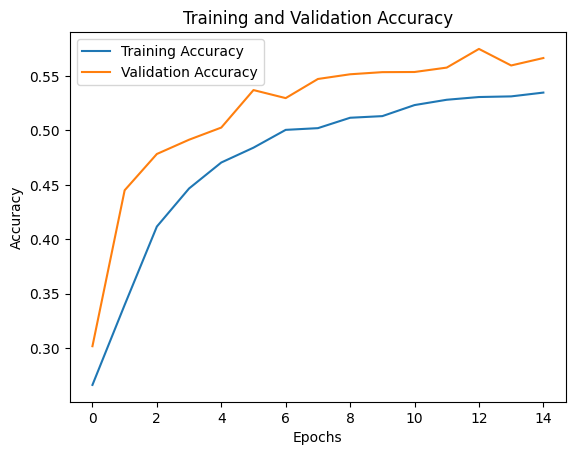

In [15]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

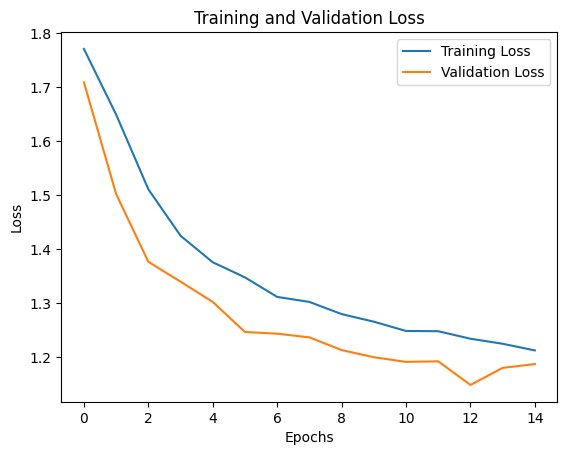

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()